In [1]:
import json
import numpy as np
import os

cw = os.getcwd()
pwd = os.path.abspath(os.path.join(cw, "..", "results"))
print(f"Parent working directory: {pwd}")

Parent working directory: /proj/sourasb-220503/IoT_attack_CL_IDS/results


## WCL

In [ ]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_WCL_random.json",
    pwd + "/2_experiment_results_LSTM_WCL_random.json",
    pwd + "/3_experiment_results_LSTM_WCL_random.json"
]

values = []
avg_fwt_list = []
avg_cost_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:
            fwt_dict = data.get("FWT_dict", {})
            values = [abs(v) for v in fwt_dict.values() if v is not None]
            domain_training_cost = data.get("domain_training_cost", {})
            print(f"Domain training cost: {list(domain_training_cost.values())}")
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")

Domain training cost keys: [[8.85408162791282], [10.474850629922003], [9.754400193924084], [13.566432684892789], [14.147411733865738], [9.813761702971533], [13.900195207912475], [11.102222746936604], [7.413909231079742], [13.960775636136532], [14.196546755963936], [8.503290647873655], [13.422360466094688], [14.443807400995865], [22.01545278611593], [14.894838456995785], [22.276544528082013], [21.907497504958883], [15.906014155130833], [15.402086907997727], [20.747895932057872], [20.95931567181833], [22.15685009304434], [19.845199829898775], [23.0236153609585], [22.942947218893096], [22.87637066701427], [12.751713773002848], [23.062057768926024], [20.6892668181099], [17.266083542024717], [22.98046146798879], [22.992575261043385], [23.067050558980554], [12.223775161895901], [17.100121578900144], [18.221330536995083], [21.9020340309944], [23.05804584384896], [23.16995810205117], [23.08438027394004], [14.01128165004775], [16.75032519781962], [11.817074078833684], [11.67572347796522], [22.4

## FWT and Adaptation rate

In [11]:
import os, json
import numpy as np

# List of files
files = [
    pwd + "/1_experiment_results_LSTM_WCL_random.json",
    pwd + "/2_experiment_results_LSTM_WCL_random.json",
    pwd + "/3_experiment_results_LSTM_WCL_random.json"
]

per_file_avg_A = []   # average A(a_t) per file
per_file_std_A = []   # std of A(a_t) per file

for file in files:
    with open(file, "r") as f:
        data = json.load(f)

    # --- Numerators: 2nd - 1st element from performance_m ---
    perf = data.get("performance_m", {}) or {}
    # Preserve the JSON/insertion order of keys
    keys_in_order = list(perf.keys())
    numerators = []
    for k in keys_in_order:
        v = perf[k]
        if isinstance(v, (list, tuple)) and len(v) >= 2:
            numerators.append(float(v[1]) - float(v[0]))
        else:
            numerators.append(np.nan)

    # --- Denominators: TT from domain_training_cost dict (take first number per key) ---
    cost_dict = data.get("domain_training_cost", {}) or {}
    denominators = []
    for k in keys_in_order:
        c = cost_dict.get(k, None)
        if isinstance(c, (list, tuple)) and len(c) >= 1:
            denominators.append(float(c[0]))
        else:
            denominators.append(np.nan)

    numerators = np.array(numerators, dtype=float)
    denominators = np.array(denominators, dtype=float)
    # print(f"nominators: {numerators}")
    # print(f"denominators: {denominators}")
    # Valid pairs: finite numerator and positive finite denominator
    valid = np.isfinite(numerators) & np.isfinite(denominators) & (denominators > 0)
    A_vals = numerators[valid] / denominators[valid]

    if A_vals.size:
        avg_numerator = float(np.mean(numerators[valid]))
        avg_A = float(np.mean(A_vals))
        std_A = float(np.std(A_vals))
        per_file_avg_A.append(avg_A)
        per_file_std_A.append(std_A)
        print(f"{os.path.basename(file)}:")
        print(f"  Domains counted: {A_vals.size}/{len(keys_in_order)}")
        print(f"  Mean numerator (2nd - 1st perf): {avg_numerator:.6f}")
        print(f"  Mean adaptation rate: {avg_A:.6f}  (std: {std_A:.6f})")
    else:
        print(f"{os.path.basename(file)}: No valid adaptation-rate entries.")

# --- Overall summary across files ---
if per_file_avg_A:
    overall_mean_A = float(np.mean(per_file_avg_A))
    overall_std_A  = float(np.std(per_file_avg_A))
    print("\n===== Overall Adaptation Rate (per-file means) =====")
    print(f"Overall mean A: {overall_mean_A:.6f} ± {overall_std_A:.6f}")
else:
    print("\nNo adaptation-rate statistics could be computed.")


1_experiment_results_LSTM_WCL_random.json:
  Domains counted: 47/48
  Mean numerator (2nd - 1st perf): 0.248722
  Mean adaptation rate: 0.015381  (std: 0.016784)
2_experiment_results_LSTM_WCL_random.json:
  Domains counted: 47/48
  Mean numerator (2nd - 1st perf): 0.257262
  Mean adaptation rate: 0.017747  (std: 0.021387)
3_experiment_results_LSTM_WCL_random.json:
  Domains counted: 47/48
  Mean numerator (2nd - 1st perf): 0.257060
  Mean adaptation rate: 0.015724  (std: 0.016242)

===== Overall Adaptation Rate (per-file means) =====
Overall mean A: 0.016284 ± 0.001044


In [25]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_WCL_b2w.json",
    pwd + "/2_experiment_results_LSTM_WCL_b2w.json",
    pwd + "/3_experiment_results_LSTM_WCL_b2w.json"
]


values = []
avg_fwt_list = []
avg_cost_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")

Number of entries: 47
Average FWT value for this file: -0.12268918743474294
Number of entries: 48
Average domain training cost: 16.067146999921533
Number of entries: 47
Average FWT value for this file: -0.1247477123744907
Number of entries: 48
Average domain training cost: 14.832972631847952
Number of entries: 47
Average FWT value for this file: -0.1403944409810955
Number of entries: 48
Average domain training cost: 15.909531362965936
Overall average domain training cost: 15.60321699824514±0.5484328948486981
Overall average FWT value: -0.12927711359677638±0.007905930573921058


In [26]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_WCL_w2b.json",
    pwd + "/2_experiment_results_LSTM_WCL_w2b.json",
    pwd + "/3_experiment_results_LSTM_WCL_w2b.json"
]


values = []
avg_fwt_list = []
avg_cost_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")

Number of entries: 47
Average FWT value for this file: -0.4192760750719144
Number of entries: 48
Average domain training cost: 21.653915387568606
Number of entries: 47
Average FWT value for this file: -0.399570268903927
Number of entries: 48
Average domain training cost: 21.713241756238858
Number of entries: 47
Average FWT value for this file: -0.38877166878181973
Number of entries: 48
Average domain training cost: 21.641707597038476
Overall average domain training cost: 21.66962158028198±0.031244171192812312
Overall average FWT value: -0.402539337585887±0.012629099397989247


In [27]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_WCL_toggle.json",
    pwd + "/2_experiment_results_LSTM_WCL_toggle.json",
    pwd + "/3_experiment_results_LSTM_WCL_toggle.json"
]


values = []
avg_fwt_list = []
avg_cost_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")

Number of entries: 47
Average FWT value for this file: -0.3082065475963028
Number of entries: 48
Average domain training cost: 16.323437775684095
Number of entries: 47
Average FWT value for this file: -0.31400652969003573
Number of entries: 48
Average domain training cost: 16.65995510198506
Number of entries: 47
Average FWT value for this file: -0.322233304494511
Number of entries: 48
Average domain training cost: 16.35760162078562
Overall average domain training cost: 16.44699816615159±0.15122782915789676
Overall average FWT value: -0.3148154605936165±0.005754896707757308


## LWF

In [28]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_LwF_random_alpha_1.0_T_4.0.json",
    pwd + "/2_experiment_results_LSTM_LwF_random_alpha_1.0_T_4.0.json",
    pwd + "/3_experiment_results_LSTM_LwF_random_alpha_1.0_T_4.0.json"
]


values = []
avg_fwt_list = []
avg_cost_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")

Number of entries: 47
Average FWT value for this file: -0.06930268164874667
Number of entries: 48
Average domain training cost: 23.455956973770906
Number of entries: 47
Average FWT value for this file: -0.06497994549033356
Number of entries: 48
Average domain training cost: 24.963494970138225
Number of entries: 47
Average FWT value for this file: -0.06658163506453542
Number of entries: 48
Average domain training cost: 25.274890915476135
Overall average domain training cost: 24.564780953128423±0.7942962594195778
Overall average FWT value: -0.06695475406787188±0.0017843626904866493


In [29]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_LwF_b2w_alpha_1.0_T_4.0.json",
    pwd + "/2_experiment_results_LSTM_LwF_b2w_alpha_1.0_T_4.0.json",
    pwd + "/3_experiment_results_LSTM_LwF_b2w_alpha_1.0_T_4.0.json"
]


values = []
avg_fwt_list = []
avg_cost_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")

Number of entries: 47
Average FWT value for this file: -0.09509467494501585
Number of entries: 48
Average domain training cost: 25.465951746242354
Number of entries: 47
Average FWT value for this file: -0.07627483276220344
Number of entries: 48
Average domain training cost: 25.66495840761733
Number of entries: 47
Average FWT value for this file: -0.08083461411067383
Number of entries: 48
Average domain training cost: 25.060380479015294
Overall average domain training cost: 25.397096877624993±0.25157419400966385
Overall average FWT value: -0.08406804060596436±0.00801614621131736


In [31]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_LwF_w2b_alpha_1.0_T_4.0.json",
    pwd + "/2_experiment_results_LSTM_LwF_w2b_alpha_1.0_T_4.0.json",
    pwd + "/3_experiment_results_LSTM_LwF_w2b_alpha_1.0_T_4.0.json"
]


values = []
avg_fwt_list = []
avg_cost_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")

Number of entries: 47
Average FWT value for this file: -0.11893662089891402
Number of entries: 48
Average domain training cost: 23.983616102816693
Number of entries: 47
Average FWT value for this file: -0.1533875064553216
Number of entries: 48
Average domain training cost: 23.735634884549654
Number of entries: 47
Average FWT value for this file: -0.13612862992825872
Number of entries: 48
Average domain training cost: 24.919521169824293
Overall average domain training cost: 24.212924052396883±0.5097929553069219
Overall average FWT value: -0.13615091909416477±0.014064523964224328


In [32]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_LwF_toggle_alpha_1.0_T_4.0.json",
    pwd + "/2_experiment_results_LSTM_LwF_toggle_alpha_1.0_T_4.0.json",
    pwd + "/3_experiment_results_LSTM_LwF_toggle_alpha_1.0_T_4.0.json"
]


values = []
avg_fwt_list = []
avg_cost_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")

Number of entries: 47
Average FWT value for this file: -0.11958894852840515
Number of entries: 48
Average domain training cost: 24.353824891213055
Number of entries: 47
Average FWT value for this file: -0.12852042444959846
Number of entries: 48
Average domain training cost: 24.656546526525442
Number of entries: 47
Average FWT value for this file: -0.15567008190801954
Number of entries: 48
Average domain training cost: 25.535848347232484
Overall average domain training cost: 24.848739921656996±0.5013306217751405
Overall average FWT value: -0.13459315162867438±0.015343197364152327


## EWC

In [33]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_EWC_random.json",
    pwd + "/2_experiment_results_LSTM_EWC_random.json",
    pwd + "/3_experiment_results_LSTM_EWC_random.json"
]


values = []
avg_fwt_list = []
avg_cost_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")

Number of entries: 47
Average FWT value for this file: -0.05046301542075671
Number of entries: 48
Average domain training cost: 102.06821682047546
Number of entries: 47
Average FWT value for this file: -0.11172019307541328
Number of entries: 48
Average domain training cost: 104.72575301183194
Number of entries: 47
Average FWT value for this file: -0.07425225496373478
Number of entries: 48
Average domain training cost: 104.23642242981684
Overall average domain training cost: 103.67679742070807±1.154847685543385
Overall average FWT value: -0.07881182115330158±0.025215110369661547


In [34]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_EWC_b2w.json",
    pwd + "/2_experiment_results_LSTM_EWC_b2w.json",
    pwd + "/3_experiment_results_LSTM_EWC_b2w.json"
]


values = []
avg_fwt_list = []
avg_cost_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")

Number of entries: 47
Average FWT value for this file: -0.4192760750719144
Number of entries: 48
Average domain training cost: 21.653915387568606
Number of entries: 47
Average FWT value for this file: -0.08373758071275778
Number of entries: 48
Average domain training cost: 96.30149935296504
Number of entries: 47
Average FWT value for this file: -0.07714951490751562
Number of entries: 48
Average domain training cost: 100.19488818571456
Overall average domain training cost: 72.71676764208273±36.14185735335599
Overall average FWT value: -0.1933877235640626±0.1597498276743247


In [4]:

# List of files
files = [ pwd + "/1_experiment_results_LSTM_EWC_w2b.json",
    pwd + "/2_experiment_results_LSTM_EWC_w2b.json",
    pwd + "/3_experiment_results_LSTM_EWC_w2b.json"
]


values = []
avg_fwt_list = []
avg_cost_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]
            print(f"Efficiency values: {efficiency_values}")

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")

Efficiency values: [81.50070263585076, 42.3508967589587, 13.721582578960806, 58.89878781000152, 26.284005956957117, 14.283309399848804, 48.8103598698508, 97.02915579103865, 21.00142341479659, 86.9403538510669, 92.30335750919767, 16.011004160856828, 123.46169095300138, 233.4387574691791, 273.6439189068042, 170.79061990603805, 256.8153156847693, 226.54178182897158, 102.7239738011267, 94.3712109378539, 109.44352539698593, 201.4615683159791, 245.68156818579882, 250.24510912084952, 77.48975808708929, 202.1686054279562, 78.1518366788514, 119.01046960684471, 77.40827980986796, 83.9788929130882, 175.5049652538728, 229.0652015018277, 99.83787654689513, 163.78896502405405, 103.5318741791416, 27.080786053091288, 54.24684664490633, 139.4828447829932, 57.84587978501804, 147.74905315996148, 237.69074067100883, 75.91801721602678, 141.43941010907292, 94.43775336816907, 75.34165824111551, 57.27087233704515, 54.52552192402072, 52.56165104196407]
Number of entries: 47
Average FWT value for this file: -0.

In [36]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_EWC_toggle.json",
    pwd + "/2_experiment_results_LSTM_EWC_toggle.json",
    pwd + "/3_experiment_results_LSTM_EWC_toggle.json"
]


values = []
avg_fwt_list = []
avg_cost_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")

Number of entries: 47
Average FWT value for this file: -0.12236628394833163
Number of entries: 48
Average domain training cost: 101.71760157844498
Number of entries: 47
Average FWT value for this file: -0.15133246107789267
Number of entries: 48
Average domain training cost: 103.71012121773674
Number of entries: 47
Average FWT value for this file: -0.133381032265256
Number of entries: 48
Average domain training cost: 109.10198567767414
Overall average domain training cost: 104.84323615795195±3.1193208910531873
Overall average FWT value: -0.1356932590971601±0.011937885046269268


## SI

In [13]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_SI_random.json",
    pwd + "/2_experiment_results_LSTM_SI_random.json",
    pwd + "/3_experiment_results_LSTM_SI_random.json"
]


values = []
avg_fwt_list = []
avg_cost_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")

Number of entries: 47
Average FWT value for this file: -0.024336637820106657
Number of entries: 48
Average domain training cost: 18.798272087122314
Number of entries: 47
Average FWT value for this file: -0.027811112249775633
Number of entries: 48
Average domain training cost: 17.99316360861364
Number of entries: 47
Average FWT value for this file: -0.03239908701466504
Number of entries: 48
Average domain training cost: 18.633192558894127
Overall average domain training cost: 18.474876084876694±0.3472251862990577
Overall average FWT value: -0.028182279028182444±0.003301928258533534


In [14]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_SI_b2w.json",
    pwd + "/2_experiment_results_LSTM_SI_b2w.json",
    pwd + "/3_experiment_results_LSTM_SI_b2w.json"
]


values = []
avg_fwt_list = []
avg_cost_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")

Number of entries: 47
Average FWT value for this file: -0.030770220887063195
Number of entries: 48
Average domain training cost: 18.21645988798021
Number of entries: 47
Average FWT value for this file: -0.03259751061911532
Number of entries: 48
Average domain training cost: 19.568289883696707
Number of entries: 47
Average FWT value for this file: -0.025751285950598637
Number of entries: 48
Average domain training cost: 18.505620401813456
Overall average domain training cost: 18.76345672449679±0.5812175503778623
Overall average FWT value: -0.02970633915225905±0.0028944292830871965


In [15]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_SI_w2b.json",
    pwd + "/2_experiment_results_LSTM_SI_w2b.json",
    pwd + "/3_experiment_results_LSTM_SI_w2b.json"
]


values = []
avg_fwt_list = []
avg_cost_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")

Number of entries: 47
Average FWT value for this file: -0.06290546712118178
Number of entries: 48
Average domain training cost: 20.491948518361216
Number of entries: 47
Average FWT value for this file: -0.0379310816512746
Number of entries: 48
Average domain training cost: 19.606338042734325
Number of entries: 47
Average FWT value for this file: -0.07415477643826075
Number of entries: 48
Average domain training cost: 21.27319156728966
Overall average domain training cost: 20.457159376128402±0.6809345937232678
Overall average FWT value: -0.058330441736905714±0.01513796901734751


In [16]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_SI_toggle.json",
    pwd + "/2_experiment_results_LSTM_SI_toggle.json",
    pwd + "/3_experiment_results_LSTM_SI_toggle.json"
]


values = []
avg_fwt_list = []
avg_cost_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")

Number of entries: 47
Average FWT value for this file: -0.045009405715027026
Number of entries: 48
Average domain training cost: 19.88963747453575
Number of entries: 47
Average FWT value for this file: -0.059213502283933635
Number of entries: 48
Average domain training cost: 19.787561741820053
Number of entries: 47
Average FWT value for this file: -0.03462769983652703
Number of entries: 48
Average domain training cost: 20.065873251822875
Overall average domain training cost: 19.914357489392895±0.11495690062197464
Overall average FWT value: -0.04628353594516257±0.010077465831521833


## GR

In [37]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_GR_random.json",
    pwd + "/2_experiment_results_LSTM_GR_random.json",
    pwd + "/3_experiment_results_LSTM_GR_random.json"
]


values = []
avg_fwt_list = []
avg_cost_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")

Number of entries: 47
Average FWT value for this file: -0.2475547746403671
Number of entries: 48
Average domain training cost: 35.78690964044654
Number of entries: 47
Average FWT value for this file: -0.2269012599671036
Number of entries: 48
Average domain training cost: 37.19064032591026
Number of entries: 47
Average FWT value for this file: -0.2577663125387628
Number of entries: 48
Average domain training cost: 36.34746421828944
Overall average domain training cost: 36.441671394882086±0.576929344847518
Overall average FWT value: -0.24407411571541116±0.012838720275705777


In [38]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_GR_b2w.json",
    pwd + "/2_experiment_results_LSTM_GR_b2w.json",
    pwd + "/3_experiment_results_LSTM_GR_b2w.json"
]


values = []
avg_fwt_list = []
avg_cost_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")

Number of entries: 47
Average FWT value for this file: -0.1370497365640883
Number of entries: 48
Average domain training cost: 36.521891842208184
Number of entries: 47
Average FWT value for this file: -0.1283508454842342
Number of entries: 48
Average domain training cost: 37.31007162730384
Number of entries: 47
Average FWT value for this file: -0.13927442393549158
Number of entries: 48
Average domain training cost: 36.943272185167494
Overall average domain training cost: 36.92507855155984±0.3220301224380998
Overall average FWT value: -0.13489166866127136±0.004713391160659185


In [3]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_GR_w2b.json",
    pwd + "/2_experiment_results_LSTM_GR_w2b.json",
    pwd + "/3_experiment_results_LSTM_GR_w2b.json"
]


values = []
avg_fwt_list = []
avg_cost_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]
            print(f"Efficiency values: {efficiency_values}")

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")

Efficiency values: [27.774944307049736, 21.08801073790528, 19.627234291052446, 21.874739965889603, 20.24667894700542, 19.6435130010359, 19.52129147690721, 27.875691096065566, 19.7731287649367, 27.097434226889163, 27.99395872792229, 19.45877850893885, 43.18732196302153, 31.424969172105193, 43.41947875497863, 30.8754815380089, 33.79402583395131, 44.09476469201036, 31.372902733972296, 42.8272552380804, 31.62471878505312, 31.390882928855717, 33.21141636604443, 31.386609785957262, 45.34804809093475, 32.6376350549981, 45.16202611499466, 44.86615267000161, 45.03370244707912, 32.476754227885976, 45.04263625713065, 45.40802315878682, 45.48935385001823, 45.036228651879355, 45.089279043953866, 36.42017975007184, 31.898613448021933, 44.80690509802662, 45.88736265199259, 45.46421325602569, 45.46593722095713, 32.33380991010927, 44.92053579399362, 33.25255312398076, 45.08365342300385, 45.573122462956235, 45.24421452009119, 45.59860377502628]
Number of entries: 47
Average FWT value for this file: -0.3

In [ ]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_GR_toggle.json",
    pwd + "/2_experiment_results_LSTM_GR_toggle.json",
    pwd + "/3_experiment_results_LSTM_GR_toggle.json"
]


values = []
bwt_values = []
avg_fwt_list = []
avg_cost_list = []
avg_bwt_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:

            bwt_values.append(data["BWT_values"][46])
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if bwt_values:
        avg_bwt_list.append(np.mean(bwt_values))
        print(f"Number of entries: {len(bwt_values)}")
        print(f"Average BWT value for this set of files: {avg_bwt_list[-1]}")
    else:
        print("No BWT_dict found or empty.")
    
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    overall_avg_bwt = np.mean(avg_bwt_list)
    overall_std_bwt = np.std(avg_bwt_list)
    print(f"Overall average BWT value: {overall_avg_bwt}±{overall_std_bwt}")
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")
    
alpha = 0.3
beta = 0.4
gamma = 0.3
composite_score = (alpha * (overall_avg_fwt+1)/2) + (beta * (1- overall_avg_bwt)) + (gamma * overall_avg_cost)
print(f"Composite score: {composite_score}")

Number of entries: 1
Average BWT value for this set of files: -0.28772987271025996
Number of entries: 47
Average FWT value for this file: -0.30065718489814036
Number of entries: 48
Average domain training cost: 37.375932355833356
Number of entries: 2
Average BWT value for this set of files: -0.2990081492839731
Number of entries: 47
Average FWT value for this file: -0.2997019052680094
Number of entries: 48
Average domain training cost: 35.8324899506697
Number of entries: 3
Average BWT value for this set of files: -0.2992684725502792
Number of entries: 47
Average FWT value for this file: -0.2634257712312175
Number of entries: 48
Average domain training cost: 36.61016928045137
Overall average BWT value: -0.2953354981815041±0.005379039329184677
Overall average domain training cost: 36.606197195651475±0.6301139831319351
Overall average FWT value: -0.2879282871324558±0.017330283781303375
Composite score: 11.413614871828308


## SI

In [6]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_SI_random.json",
    pwd + "/2_experiment_results_LSTM_SI_random.json",
    pwd + "/3_experiment_results_LSTM_SI_random.json"
]


values = []
bwt_values = []
avg_fwt_list = []
avg_cost_list = []
avg_bwt_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:

            bwt_values.append(data["BWT_values"][46])
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if bwt_values:
        avg_bwt_list.append(np.mean(bwt_values))
        print(f"Number of entries: {len(bwt_values)}")
        print(f"Average BWT value for this set of files: {avg_bwt_list[-1]}")
    else:
        print("No BWT_dict found or empty.")
    
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    overall_avg_bwt = np.mean(avg_bwt_list)
    overall_std_bwt = np.std(avg_bwt_list)
    print(f"Overall average BWT value: {overall_avg_bwt}±{overall_std_bwt}")
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")
    
alpha = 0.3
beta = 0.4
gamma = 0.3
composite_score = (alpha * (overall_avg_fwt+1)/2) + (beta * (1- overall_avg_bwt)) + (gamma * overall_avg_cost)
print(f"Composite score: {composite_score}")

Number of entries: 1
Average BWT value for this set of files: -0.035032324327999374
Number of entries: 47
Average FWT value for this file: -0.024336637820106657
Number of entries: 48
Average domain training cost: 18.798272087122314
Number of entries: 2
Average BWT value for this set of files: -0.036350943341204374
Number of entries: 47
Average FWT value for this file: -0.027811112249775633
Number of entries: 48
Average domain training cost: 17.99316360861364
Number of entries: 3
Average BWT value for this set of files: -0.037971090986859635
Number of entries: 47
Average FWT value for this file: -0.03239908701466504
Number of entries: 48
Average domain training cost: 18.633192558894127
Overall average BWT value: -0.03645145288535446±0.001201849684210722
Overall average domain training cost: 18.474876084876694±0.3472251862990577
Overall average FWT value: -0.028182279028182444±0.003301928258533534
Composite score: 6.102816064762922


In [7]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_SI_b2w.json",
    pwd + "/2_experiment_results_LSTM_SI_b2w.json",
    pwd + "/3_experiment_results_LSTM_SI_b2w.json"
]


values = []
bwt_values = []
avg_fwt_list = []
avg_cost_list = []
avg_bwt_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:

            bwt_values.append(data["BWT_values"][46])
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if bwt_values:
        avg_bwt_list.append(np.mean(bwt_values))
        print(f"Number of entries: {len(bwt_values)}")
        print(f"Average BWT value for this set of files: {avg_bwt_list[-1]}")
    else:
        print("No BWT_dict found or empty.")
    
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    overall_avg_bwt = np.mean(avg_bwt_list)
    overall_std_bwt = np.std(avg_bwt_list)
    print(f"Overall average BWT value: {overall_avg_bwt}±{overall_std_bwt}")
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")
    
alpha = 0.3
beta = 0.4
gamma = 0.3
composite_score = (alpha * (overall_avg_fwt+1)/2) + (beta * (1- overall_avg_bwt)) + (gamma * overall_avg_cost)
print(f"Composite score: {composite_score}")

Number of entries: 1
Average BWT value for this set of files: -0.07174271609209029
Number of entries: 47
Average FWT value for this file: -0.030770220887063195
Number of entries: 48
Average domain training cost: 18.21645988798021
Number of entries: 2
Average BWT value for this set of files: -0.11497755093144346
Number of entries: 47
Average FWT value for this file: -0.03259751061911532
Number of entries: 48
Average domain training cost: 19.568289883696707
Number of entries: 3
Average BWT value for this set of files: -0.08962266558577205
Number of entries: 47
Average FWT value for this file: -0.025751285950598637
Number of entries: 48
Average domain training cost: 18.505620401813456
Overall average BWT value: -0.09211431086976861±0.01773826293754988
Overall average domain training cost: 18.76345672449679±0.5812175503778623
Overall average FWT value: -0.02970633915225905±0.0028944292830871965
Composite score: 6.211426790824106


In [8]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_SI_w2b.json",
    pwd + "/2_experiment_results_LSTM_SI_w2b.json",
    pwd + "/3_experiment_results_LSTM_SI_w2b.json"
]


values = []
bwt_values = []
avg_fwt_list = []
avg_cost_list = []
avg_bwt_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:

            bwt_values.append(data["BWT_values"][46])
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if bwt_values:
        avg_bwt_list.append(np.mean(bwt_values))
        print(f"Number of entries: {len(bwt_values)}")
        print(f"Average BWT value for this set of files: {avg_bwt_list[-1]}")
    else:
        print("No BWT_dict found or empty.")
    
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    overall_avg_bwt = np.mean(avg_bwt_list)
    overall_std_bwt = np.std(avg_bwt_list)
    print(f"Overall average BWT value: {overall_avg_bwt}±{overall_std_bwt}")
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")
    
alpha = 0.3
beta = 0.4
gamma = 0.3
composite_score = (alpha * (overall_avg_fwt+1)/2) + (beta * (1- overall_avg_bwt)) + (gamma * overall_avg_cost)
print(f"Composite score: {composite_score}")

Number of entries: 1
Average BWT value for this set of files: -0.024039679862379926
Number of entries: 47
Average FWT value for this file: -0.06290546712118178
Number of entries: 48
Average domain training cost: 20.491948518361216
Number of entries: 2
Average BWT value for this set of files: -0.03436556442160636
Number of entries: 47
Average FWT value for this file: -0.0379310816512746
Number of entries: 48
Average domain training cost: 19.606338042734325
Number of entries: 3
Average BWT value for this set of files: -0.036318254513149364
Number of entries: 47
Average FWT value for this file: -0.07415477643826075
Number of entries: 48
Average domain training cost: 21.27319156728966
Overall average BWT value: -0.031574499599045215±0.005387230642697796
Overall average domain training cost: 20.457159376128402±0.6809345937232678
Overall average FWT value: -0.058330441736905714±0.01513796901734751
Composite score: 6.691028046417603


In [5]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_SI_toggle.json",
    pwd + "/2_experiment_results_LSTM_SI_toggle.json",
    pwd + "/3_experiment_results_LSTM_SI_toggle.json"
]


values = []
bwt_values = []
avg_fwt_list = []
avg_cost_list = []
avg_bwt_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:

            bwt_values.append(data["BWT_values"][46])
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if bwt_values:
        avg_bwt_list.append(np.mean(bwt_values))
        print(f"Number of entries: {len(bwt_values)}")
        print(f"Average BWT value for this set of files: {avg_bwt_list[-1]}")
    else:
        print("No BWT_dict found or empty.")
    
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    overall_avg_bwt = np.mean(avg_bwt_list)
    overall_std_bwt = np.std(avg_bwt_list)
    print(f"Overall average BWT value: {overall_avg_bwt}±{overall_std_bwt}")
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")
    
alpha = 0.3
beta = 0.4
gamma = 0.3
composite_score = (alpha * (overall_avg_fwt+1)/2) + (beta * (1- overall_avg_bwt)) + (gamma * overall_avg_cost)
print(f"Composite score: {composite_score}")

Number of entries: 1
Average BWT value for this set of files: -0.012818829633809013
Number of entries: 47
Average FWT value for this file: -0.045009405715027026
Number of entries: 48
Average domain training cost: 19.88963747453575
Number of entries: 2
Average BWT value for this set of files: -0.015249455867566347
Number of entries: 47
Average FWT value for this file: -0.059213502283933635
Number of entries: 48
Average domain training cost: 19.787561741820053
Number of entries: 3
Average BWT value for this set of files: -0.020610571567194275
Number of entries: 47
Average FWT value for this file: -0.03462769983652703
Number of entries: 48
Average domain training cost: 20.065873251822875
Overall average BWT value: -0.016226285689523213±0.0032550942602754007
Overall average domain training cost: 19.914357489392895±0.11495690062197464
Overall average FWT value: -0.04628353594516257±0.010077465831521833
Composite score: 6.523855230701903


## Replay


In [9]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_Replay_REPLAY_random.json",
    pwd + "/2_experiment_results_LSTM_Replay_REPLAY_random.json",
    pwd + "/3_experiment_results_LSTM_Replay_REPLAY_random.json"
]


values = []
bwt_values = []
avg_fwt_list = []
avg_cost_list = []
avg_bwt_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:

            bwt_values.append(data["BWT_values"][46])
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if bwt_values:
        avg_bwt_list.append(np.mean(bwt_values))
        print(f"Number of entries: {len(bwt_values)}")
        print(f"Average BWT value for this set of files: {avg_bwt_list[-1]}")
    else:
        print("No BWT_dict found or empty.")
    
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    overall_avg_bwt = np.mean(avg_bwt_list)
    overall_std_bwt = np.std(avg_bwt_list)
    print(f"Overall average BWT value: {overall_avg_bwt}±{overall_std_bwt}")
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")
    
alpha = 0.3
beta = 0.4
gamma = 0.3
composite_score = (alpha * (overall_avg_fwt+1)/2) + (beta * (1- overall_avg_bwt)) + (gamma * overall_avg_cost)
print(f"Composite score: {composite_score}")

Number of entries: 1
Average BWT value for this set of files: -0.07610193568848425
Number of entries: 47
Average FWT value for this file: -0.30596965580096835
Number of entries: 48
Average domain training cost: 27.123321418735333
Number of entries: 2
Average BWT value for this set of files: -0.08434039794410617
Number of entries: 47
Average FWT value for this file: -0.3114543700562376
Number of entries: 48
Average domain training cost: 29.973210101593093
Number of entries: 3
Average BWT value for this set of files: -0.08107516138271163
Number of entries: 47
Average FWT value for this file: -0.3275884356711656
Number of entries: 48
Average domain training cost: 28.65460188506404
Overall average BWT value: -0.08050583167176735±0.0033873457971445877
Overall average domain training cost: 28.583711135130823±1.164541540690228
Overall average FWT value: -0.3150041538427905±0.009175824557588511
Composite score: 9.110065050131535


In [11]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_Replay_REPLAY_b2w.json",
    pwd + "/2_experiment_results_LSTM_Replay_REPLAY_b2w.json",
    pwd + "/3_experiment_results_LSTM_Replay_REPLAY_b2w.json"
]


values = []
bwt_values = []
avg_fwt_list = []
avg_cost_list = []
avg_bwt_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:

            bwt_values.append(data["BWT_values"][46])
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if bwt_values:
        avg_bwt_list.append(np.mean(bwt_values))
        print(f"Number of entries: {len(bwt_values)}")
        print(f"Average BWT value for this set of files: {avg_bwt_list[-1]}")
    else:
        print("No BWT_dict found or empty.")
    
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    overall_avg_bwt = np.mean(avg_bwt_list)
    overall_std_bwt = np.std(avg_bwt_list)
    print(f"Overall average BWT value: {overall_avg_bwt}±{overall_std_bwt}")
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")
    
alpha = 0.3
beta = 0.4
gamma = 0.3
composite_score = (alpha * (overall_avg_fwt+1)/2) + (beta * (1- overall_avg_bwt)) + (gamma * overall_avg_cost)
print(f"Composite score: {composite_score}")

Number of entries: 1
Average BWT value for this set of files: -0.07800977034254544
Number of entries: 47
Average FWT value for this file: -0.32526018049833455
Number of entries: 48
Average domain training cost: 28.78819773458478
Number of entries: 2
Average BWT value for this set of files: -0.0825359801774736
Number of entries: 47
Average FWT value for this file: -0.30518997412538024
Number of entries: 48
Average domain training cost: 27.755070991976634
Number of entries: 3
Average BWT value for this set of files: -0.08133476528261048
Number of entries: 47
Average FWT value for this file: -0.3240646975492419
Number of entries: 48
Average domain training cost: 29.78179566953865
Overall average BWT value: -0.08062683860087651±0.0019144214108503296
Overall average domain training cost: 28.775021465366688±0.8274593404764548
Overall average FWT value: -0.3181716173909856±0.009192373334345156
Composite score: 9.167031432441709


In [12]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_Replay_REPLAY_w2b.json",
    pwd + "/2_experiment_results_LSTM_Replay_REPLAY_w2b.json",
    pwd + "/3_experiment_results_LSTM_Replay_REPLAY_w2b.json"
]


values = []
bwt_values = []
avg_fwt_list = []
avg_cost_list = []
avg_bwt_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:

            bwt_values.append(data["BWT_values"][46])
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if bwt_values:
        avg_bwt_list.append(np.mean(bwt_values))
        print(f"Number of entries: {len(bwt_values)}")
        print(f"Average BWT value for this set of files: {avg_bwt_list[-1]}")
    else:
        print("No BWT_dict found or empty.")
    
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    overall_avg_bwt = np.mean(avg_bwt_list)
    overall_std_bwt = np.std(avg_bwt_list)
    print(f"Overall average BWT value: {overall_avg_bwt}±{overall_std_bwt}")
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")
    
alpha = 0.3
beta = 0.4
gamma = 0.3
composite_score = (alpha * (overall_avg_fwt+1)/2) + (beta * (1- overall_avg_bwt)) + (gamma * overall_avg_cost)
print(f"Composite score: {composite_score}")

Number of entries: 1
Average BWT value for this set of files: -0.08061848194357017
Number of entries: 47
Average FWT value for this file: -0.3156481537538388
Number of entries: 48
Average domain training cost: 28.859717265748866
Number of entries: 2
Average BWT value for this set of files: -0.08074649431937866
Number of entries: 47
Average FWT value for this file: -0.31410472871750955
Number of entries: 48
Average domain training cost: 27.690939479522058
Number of entries: 3
Average BWT value for this set of files: -0.07885784568400313
Number of entries: 47
Average FWT value for this file: -0.3158278803706999
Number of entries: 48
Average domain training cost: 27.714847674731573
Overall average BWT value: -0.08007427398231731±0.0008617308728347102
Overall average domain training cost: 28.088501473334166±0.5454192572702948
Overall average FWT value: -0.3151935876140161±0.0007734277327060234
Composite score: 8.961301113451073


In [14]:
# List of files
files = [ pwd + "/1_experiment_results_LSTM_Replay_REPLAY_toggle.json",
    pwd + "/2_experiment_results_LSTM_Replay_REPLAY_toggle.json",
    pwd + "/3_experiment_results_LSTM_Replay_REPLAY_toggle.json"
]


values = []
bwt_values = []
avg_fwt_list = []
avg_cost_list = []
avg_bwt_list = []
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:

            bwt_values.append(data["BWT_values"][46])
            fwt_dict = data.get("FWT_dict", {})
            values = list(fwt_dict.values())
            domain_training_cost = data.get("domain_training_cost", {})
            efficiency_values = [v[0] for v in domain_training_cost.values() if v]

        except (KeyError, IndexError) as e:
            print(f"Problem with {file}: {e}")
    if bwt_values:
        avg_bwt_list.append(np.mean(bwt_values))
        print(f"Number of entries: {len(bwt_values)}")
        print(f"Average BWT value for this set of files: {avg_bwt_list[-1]}")
    else:
        print("No BWT_dict found or empty.")
    
    if values:
        avg_fwt_list.append(np.mean(values))
        print(f"Number of entries: {len(values)}")
        print(f"Average FWT value for this file: {avg_fwt_list[-1]}")
    else:
        print("No FWT_dict found or empty.")
    
    if efficiency_values:
        avg_cost_list.append(np.mean(efficiency_values )) 
        print(f"Number of entries: {len(efficiency_values )}")
        print(f"Average domain training cost: {avg_cost_list[-1]}")
    else:
        print("No domain_training_cost found or empty.")

if avg_fwt_list:
    overall_avg_fwt = np.mean(avg_fwt_list)
    overall_std_fwt = np.std(avg_fwt_list)
    overall_avg_cost = np.mean(avg_cost_list)
    overall_std_cost = np.std(avg_cost_list)
    overall_avg_bwt = np.mean(avg_bwt_list)
    overall_std_bwt = np.std(avg_bwt_list)
    print(f"Overall average BWT value: {overall_avg_bwt}±{overall_std_bwt}")
    print(f"Overall average domain training cost: {overall_avg_cost}±{overall_std_cost}")
    print(f"Overall average FWT value: {overall_avg_fwt}±{overall_std_fwt}")
    
alpha = 0.3
beta = 0.4
gamma = 0.3
composite_score = (alpha * (overall_avg_fwt+1)/2) + (beta * (1- overall_avg_bwt)) + (gamma * overall_avg_cost)
print(f"Composite score: {composite_score}")

Number of entries: 1
Average BWT value for this set of files: -0.07572162396272952
Number of entries: 47
Average FWT value for this file: -0.3102592149602814
Number of entries: 48
Average domain training cost: 27.59192374300134
Number of entries: 2
Average BWT value for this set of files: -0.07932870249350615
Number of entries: 47
Average FWT value for this file: -0.30147836381158477
Number of entries: 48
Average domain training cost: 27.441598321020138
Number of entries: 3
Average BWT value for this set of files: -0.08208506445375811
Number of entries: 47
Average FWT value for this file: -0.32371926962974873
Number of entries: 48
Average domain training cost: 27.400487582781352
Overall average BWT value: -0.07904513030333127±0.0026055906062408688
Overall average domain training cost: 27.478003215600946±0.08228381016142888
Overall average FWT value: -0.31181894946720495±0.009146549502487297
Composite score: 8.778246174381536


## FWT Box plot

Current working directory: /proj/sourasb-220503/IoT_attack_CL_IDS/notebooks
WO/CL: n=141, mean=-0.2543, std=0.2313
EWC: n=141, mean=-0.0788, std=0.1549
SI: n=141, mean=-0.0282, std=0.0815
LwF: n=141, mean=-0.0670, std=0.0798
Replay: n=141, mean=-0.3150, std=0.2381
GR: n=141, mean=-0.2441, std=0.2180


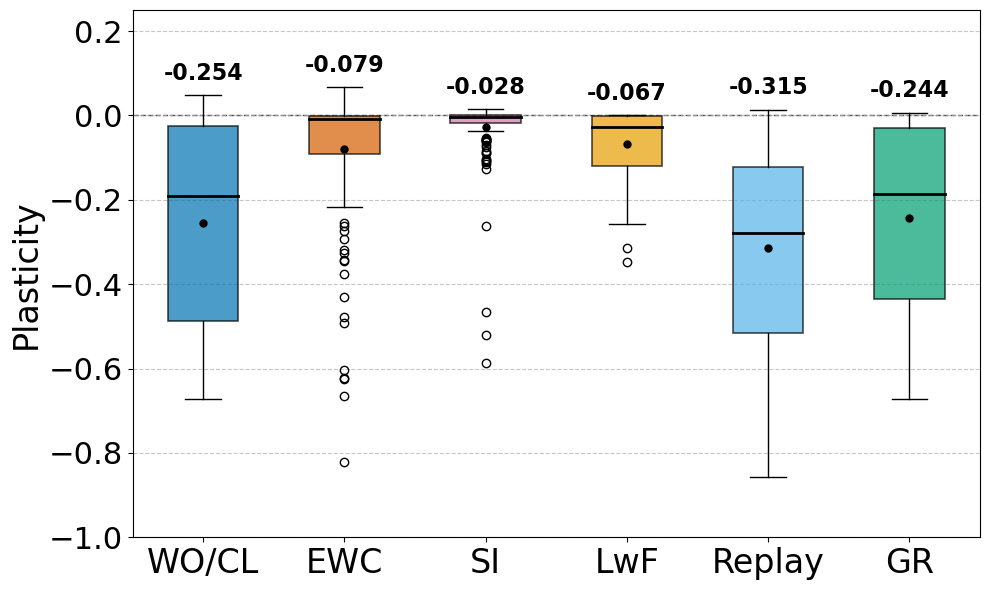

Saved boxplot to: /proj/sourasb-220503/IoT_attack_CL_IDS/results/plots/FWT_boxplot_6methods_random.png


In [11]:
import os, json
import numpy as np
import matplotlib.pyplot as plt

cwd = os.getcwd()
print(f"Current working directory: {cwd}")
pwd = os.path.abspath(os.path.join(cwd, "..", "results"))


def resolve_file(i, head, tail):
    cand1 = os.path.join(pwd, f"{i}_experiment_results_LSTM_{head}_{tail}.json")
    cand2 = os.path.join(pwd, f"{i}_experiment_results_LSTM__{head}_{tail}.json")
    if os.path.exists(cand1): return cand1
    if os.path.exists(cand2): return cand2
    print(f"[WARN] Neither exists: {cand1} nor {cand2}")
    return cand1

def collect_fwt_from_file(fp, scale01=True, clip01=True):
    with open(fp, "r") as f:
        data = json.load(f)
    fwt_dict = data.get("FWT_dict", {}) or {}
    vals = []
    for v in fwt_dict.values():
        if v is None: continue
        if isinstance(v, (list, tuple, np.ndarray)):
            vals.extend([float(x) for x in v if x is not None])
        else:
            vals.append(float(v))
    # arr = np.asarray(vals, dtype=float)
    # arr = arr[np.isfinite(arr)]
    # if scale01:
    #     arr = (arr + 1.0) / 2.0
    #     if clip01:
    #        arr = np.clip(arr, 0.0, 1.0)
    return vals # arr.tolist()

methods = [
    ("WO/CL",  lambda i: resolve_file(i, "WCL",           "random")),
    ("EWC",    lambda i: resolve_file(i, "EWC",           "random")),
    ("SI",     lambda i: resolve_file(i, "SI",            "random")),
    ("LwF",    lambda i: os.path.join(pwd, f"{i}_experiment_results_LSTM_LwF_random_alpha_1.0_T_4.0.json")),
    ("Replay", lambda i: resolve_file(i, "Replay_REPLAY", "random")),
    ("GR",     lambda i: resolve_file(i, "GR",            "random")),
]

fwt_groups, labels = [], []
for label, path_fn in methods:
    vals_all = []
    for i in (1, 2, 3):
        fp = path_fn(i)
        if not os.path.exists(fp):
            print(f"[WARN] Missing file for {label} run {i}: {fp}")
            continue
        vals_all.extend(collect_fwt_from_file(fp, scale01=True, clip01=True))
    if len(vals_all) == 0:
        print(f"[WARN] No FWT values for {label}; skipping.")
        continue
    fwt_groups.append(vals_all)
    labels.append(label)
    print(f"{label}: n={len(vals_all)}, mean={np.mean(vals_all):.4f}, std={np.std(vals_all):.4f}")

if not fwt_groups:
    raise RuntimeError("No data collected. Check file paths and FWT_dict contents.")

plt.figure(figsize=(10, 6))
bp = plt.boxplot(fwt_groups, labels=labels, showmeans=True, patch_artist=True)

palette = {
    "WO/CL": "#0072B2",
    "EWC":   "#D55E00",
    "SI":    "#CC79A7",
    "LwF":   "#E69F00",
    "Replay":"#56B4E9",
    "GR":    "#009E73",
}
for box, lab in zip(bp["boxes"], labels):
    box.set(facecolor=palette.get(lab, "#AAAAAA"), alpha=0.7, edgecolor="black", linewidth=1.2)
for median in bp["medians"]:
    median.set(color="black", linewidth=2)
for mean in bp["means"]:
    mean.set(marker="o", markerfacecolor="black", markeredgecolor="black", markersize=5)
for w in bp["whiskers"]:
    w.set(color="black")
for c in bp["caps"]:
    c.set(color="black")

plt.ylabel("Plasticity", fontsize=24)
plt.ylim(-1, 0.25)
plt.yticks(fontsize=22)
plt.xticks(fontsize=24)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# ---- Annotate mean values above each box ----
means = [float(np.mean(g)) for g in fwt_groups]
ax = plt.gca()
ymin, ymax = ax.get_ylim()
yrange = ymax - ymin
offset = 0.02 * yrange  # 2% of axis range
# medians = [float(np.median(g)) for g in fwt_groups]
# for x, md in enumerate(medians, start=1):
#     y = max(md - offset, ymin + 0.6 * yrange)
#     plt.text(x, y, f"{md:.3f}", ha="center", va="top", fontsize=12)
whisker_tops = [max(bp["whiskers"][i+1].get_ydata()) for i in range(0, len(bp["whiskers"]), 2)]

for x, (m, top) in enumerate(zip(means, whisker_tops), start=1):
    y = min(top + 0.02 * yrange, ymax - 0.01 * yrange)  # 2% above whisker, stay inside axes
    ax.text(
        x, y, f"{m:.3f}",
        ha="center", va="bottom", fontsize=16, fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.25", facecolor="white", edgecolor="none", alpha=0.8),
        zorder=3
    )
ax = plt.gca()
ax.axhline(0, linestyle="--", linewidth=1, color="0.3", zorder=0)
plt.tight_layout()

out_dir = os.path.join(pwd, "plots")
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, "FWT_boxplot_6methods_random.png")
plt.savefig(out_path, dpi=200)
plt.show()

print(f"Saved boxplot to: {out_path}")


Current working directory: /proj/sourasb-220503/IoT_attack_CL_IDS/notebooks
WO/CL: n=141, mean=-0.4025, std=0.2250
EWC: n=141, mean=-0.1638, std=0.1647
SI: n=141, mean=-0.0583, std=0.1167
LwF: n=141, mean=-0.1362, std=0.1488
Replay: n=141, mean=-0.3152, std=0.2310
GR: n=141, mean=-0.3793, std=0.2213


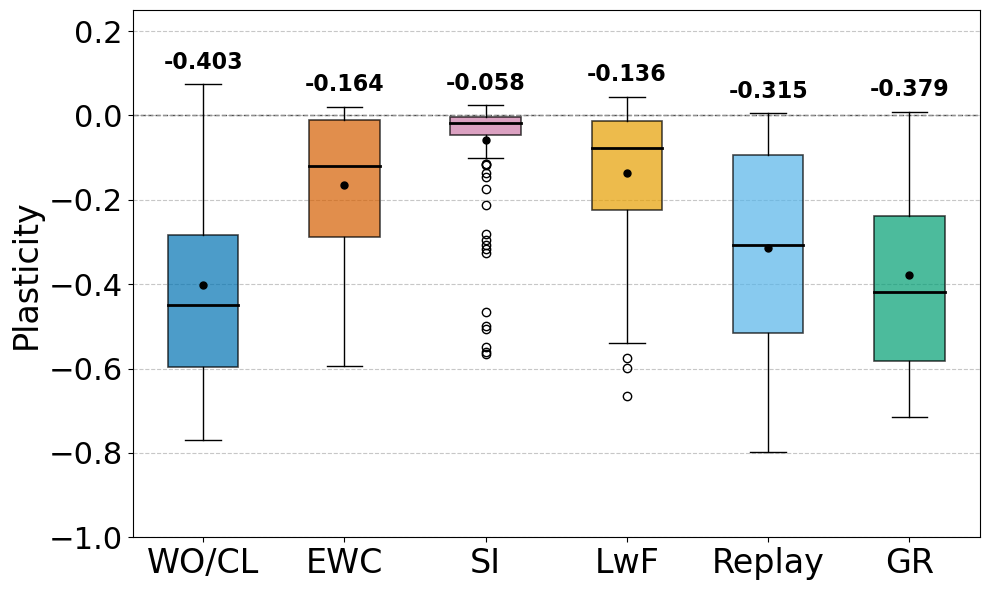

Saved boxplot to: /proj/sourasb-220503/IoT_attack_CL_IDS/results/plots/FWT_boxplot_6methods_w2b.png


In [12]:
import os, json
import numpy as np
import matplotlib.pyplot as plt

cwd = os.getcwd()
print(f"Current working directory: {cwd}")
pwd = os.path.abspath(os.path.join(cwd, "..", "results"))


def resolve_file(i, head, tail):
    cand1 = os.path.join(pwd, f"{i}_experiment_results_LSTM_{head}_{tail}.json")
    cand2 = os.path.join(pwd, f"{i}_experiment_results_LSTM__{head}_{tail}.json")
    if os.path.exists(cand1): return cand1
    if os.path.exists(cand2): return cand2
    print(f"[WARN] Neither exists: {cand1} nor {cand2}")
    return cand1

def collect_fwt_from_file(fp, scale01=True, clip01=True):
    with open(fp, "r") as f:
        data = json.load(f)
    fwt_dict = data.get("FWT_dict", {}) or {}
    vals = []
    for v in fwt_dict.values():
        if v is None: continue
        if isinstance(v, (list, tuple, np.ndarray)):
            vals.extend([float(x) for x in v if x is not None])
        else:
            vals.append(float(v))
    # arr = np.asarray(vals, dtype=float)
    # arr = arr[np.isfinite(arr)]
    # if scale01:
    #     arr = (arr + 1.0) / 2.0
    #     if clip01:
    #        arr = np.clip(arr, 0.0, 1.0)
    return vals # arr.tolist()

methods = [
    ("WO/CL",  lambda i: resolve_file(i, "WCL",           "w2b")),
    ("EWC",    lambda i: resolve_file(i, "EWC",           "w2b")),
    ("SI",     lambda i: resolve_file(i, "SI",            "w2b")),
    ("LwF",    lambda i: os.path.join(pwd, f"{i}_experiment_results_LSTM_LwF_w2b_alpha_1.0_T_4.0.json")),
    ("Replay", lambda i: resolve_file(i, "Replay_REPLAY", "w2b")),
    ("GR",     lambda i: resolve_file(i, "GR",            "w2b")),
]

fwt_groups, labels = [], []
for label, path_fn in methods:
    vals_all = []
    for i in (1, 2, 3):
        fp = path_fn(i)
        if not os.path.exists(fp):
            print(f"[WARN] Missing file for {label} run {i}: {fp}")
            continue
        vals_all.extend(collect_fwt_from_file(fp, scale01=True, clip01=True))
    if len(vals_all) == 0:
        print(f"[WARN] No FWT values for {label}; skipping.")
        continue
    fwt_groups.append(vals_all)
    labels.append(label)
    print(f"{label}: n={len(vals_all)}, mean={np.mean(vals_all):.4f}, std={np.std(vals_all):.4f}")

if not fwt_groups:
    raise RuntimeError("No data collected. Check file paths and FWT_dict contents.")

plt.figure(figsize=(10, 6))
bp = plt.boxplot(fwt_groups, labels=labels, showmeans=True, patch_artist=True)

palette = {
    "WO/CL": "#0072B2",
    "EWC":   "#D55E00",
    "SI":    "#CC79A7",
    "LwF":   "#E69F00",
    "Replay":"#56B4E9",
    "GR":    "#009E73",
}
for box, lab in zip(bp["boxes"], labels):
    box.set(facecolor=palette.get(lab, "#AAAAAA"), alpha=0.7, edgecolor="black", linewidth=1.2)
for median in bp["medians"]:
    median.set(color="black", linewidth=2)
for mean in bp["means"]:
    mean.set(marker="o", markerfacecolor="black", markeredgecolor="black", markersize=5)
for w in bp["whiskers"]:
    w.set(color="black")
for c in bp["caps"]:
    c.set(color="black")

plt.ylabel("Plasticity", fontsize=24)
plt.ylim(-1, 0.25)
plt.yticks(fontsize=22)
plt.xticks(fontsize=24)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# ---- Annotate mean values above each box ----
means = [float(np.mean(g)) for g in fwt_groups]
ax = plt.gca()
ymin, ymax = ax.get_ylim()
yrange = ymax - ymin
offset = 0.02 * yrange  # 2% of axis range
# medians = [float(np.median(g)) for g in fwt_groups]
# for x, md in enumerate(medians, start=1):
#     y = max(md - offset, ymin + 0.6 * yrange)
#     plt.text(x, y, f"{md:.3f}", ha="center", va="top", fontsize=12)
whisker_tops = [max(bp["whiskers"][i+1].get_ydata()) for i in range(0, len(bp["whiskers"]), 2)]

for x, (m, top) in enumerate(zip(means, whisker_tops), start=1):
    y = min(top + 0.02 * yrange, ymax - 0.01 * yrange)  # 2% above whisker, stay inside axes
    ax.text(
        x, y, f"{m:.3f}",
        ha="center", va="bottom", fontsize=16, fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.25", facecolor="white", edgecolor="none", alpha=0.8),
        zorder=3
    )
ax = plt.gca()
ax.axhline(0, linestyle="--", linewidth=1, color="0.3", zorder=0)
plt.tight_layout()

out_dir = os.path.join(pwd, "plots")
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, "FWT_boxplot_6methods_w2b.png")
plt.savefig(out_path, dpi=200)
plt.show()

print(f"Saved boxplot to: {out_path}")


Current working directory: /proj/sourasb-220503/IoT_attack_CL_IDS/notebooks
WO/CL: n=141, mean=-0.1293, std=0.1519
EWC: n=141, mean=-0.1934, std=0.2267
SI: n=141, mean=-0.0297, std=0.0596
LwF: n=141, mean=-0.0841, std=0.1107
Replay: n=141, mean=-0.3182, std=0.2376
GR: n=141, mean=-0.1349, std=0.1599


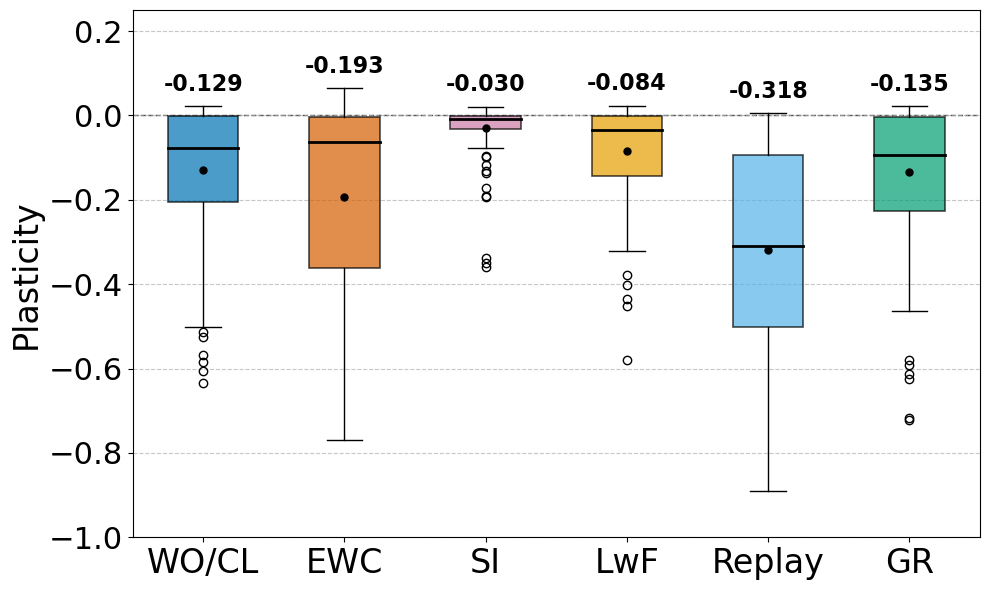

Saved boxplot to: /proj/sourasb-220503/IoT_attack_CL_IDS/results/plots/FWT_boxplot_6methods_b2w.png


In [10]:
import os, json
import numpy as np
import matplotlib.pyplot as plt

cwd = os.getcwd()
print(f"Current working directory: {cwd}")
pwd = os.path.abspath(os.path.join(cwd, "..", "results"))


def resolve_file(i, head, tail):
    cand1 = os.path.join(pwd, f"{i}_experiment_results_LSTM_{head}_{tail}.json")
    cand2 = os.path.join(pwd, f"{i}_experiment_results_LSTM__{head}_{tail}.json")
    if os.path.exists(cand1): return cand1
    if os.path.exists(cand2): return cand2
    print(f"[WARN] Neither exists: {cand1} nor {cand2}")
    return cand1

def collect_fwt_from_file(fp, scale01=True, clip01=True):
    with open(fp, "r") as f:
        data = json.load(f)
    fwt_dict = data.get("FWT_dict", {}) or {}
    vals = []
    for v in fwt_dict.values():
        if v is None: continue
        if isinstance(v, (list, tuple, np.ndarray)):
            vals.extend([float(x) for x in v if x is not None])
        else:
            vals.append(float(v))
    # arr = np.asarray(vals, dtype=float)
    # arr = arr[np.isfinite(arr)]
    # if scale01:
    #     arr = (arr + 1.0) / 2.0
    #     if clip01:
    #        arr = np.clip(arr, 0.0, 1.0)
    return vals # arr.tolist()

methods = [
    ("WO/CL",  lambda i: resolve_file(i, "WCL",           "b2w")),
    ("EWC",    lambda i: resolve_file(i, "EWC",           "b2w")),
    ("SI",     lambda i: resolve_file(i, "SI",            "b2w")),
    ("LwF",    lambda i: os.path.join(pwd, f"{i}_experiment_results_LSTM_LwF_b2w_alpha_1.0_T_4.0.json")),
    ("Replay", lambda i: resolve_file(i, "Replay_REPLAY", "b2w")),
    ("GR",     lambda i: resolve_file(i, "GR",            "b2w")),
]

fwt_groups, labels = [], []
for label, path_fn in methods:
    vals_all = []
    for i in (1, 2, 3):
        fp = path_fn(i)
        if not os.path.exists(fp):
            print(f"[WARN] Missing file for {label} run {i}: {fp}")
            continue
        vals_all.extend(collect_fwt_from_file(fp, scale01=True, clip01=True))
    if len(vals_all) == 0:
        print(f"[WARN] No FWT values for {label}; skipping.")
        continue
    fwt_groups.append(vals_all)
    labels.append(label)
    print(f"{label}: n={len(vals_all)}, mean={np.mean(vals_all):.4f}, std={np.std(vals_all):.4f}")

if not fwt_groups:
    raise RuntimeError("No data collected. Check file paths and FWT_dict contents.")

plt.figure(figsize=(10, 6))
bp = plt.boxplot(fwt_groups, labels=labels, showmeans=True, patch_artist=True)

palette = {
    "WO/CL": "#0072B2",
    "EWC":   "#D55E00",
    "SI":    "#CC79A7",
    "LwF":   "#E69F00",
    "Replay":"#56B4E9",
    "GR":    "#009E73",
}
for box, lab in zip(bp["boxes"], labels):
    box.set(facecolor=palette.get(lab, "#AAAAAA"), alpha=0.7, edgecolor="black", linewidth=1.2)
for median in bp["medians"]:
    median.set(color="black", linewidth=2)
for mean in bp["means"]:
    mean.set(marker="o", markerfacecolor="black", markeredgecolor="black", markersize=5)
for w in bp["whiskers"]:
    w.set(color="black")
for c in bp["caps"]:
    c.set(color="black")

plt.ylabel("Plasticity", fontsize=24)
plt.ylim(-1, 0.25)
plt.yticks(fontsize=22)
plt.xticks(fontsize=24)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# ---- Annotate mean values above each box ----
means = [float(np.mean(g)) for g in fwt_groups]
ax = plt.gca()
ymin, ymax = ax.get_ylim()
yrange = ymax - ymin
offset = 0.02 * yrange  # 2% of axis range
# medians = [float(np.median(g)) for g in fwt_groups]
# for x, md in enumerate(medians, start=1):
#     y = max(md - offset, ymin + 0.6 * yrange)
#     plt.text(x, y, f"{md:.3f}", ha="center", va="top", fontsize=12)
whisker_tops = [max(bp["whiskers"][i+1].get_ydata()) for i in range(0, len(bp["whiskers"]), 2)]

for x, (m, top) in enumerate(zip(means, whisker_tops), start=1):
    y = min(top + 0.02 * yrange, ymax - 0.01 * yrange)  # 2% above whisker, stay inside axes
    ax.text(
        x, y, f"{m:.3f}",
        ha="center", va="bottom", fontsize=16, fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.25", facecolor="white", edgecolor="none", alpha=0.8),
        zorder=3
    )
ax = plt.gca()
ax.axhline(0, linestyle="--", linewidth=1, color="0.3", zorder=0)
plt.tight_layout()

out_dir = os.path.join(pwd, "plots")
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, "FWT_boxplot_6methods_b2w.png")
plt.savefig(out_path, dpi=200)
plt.show()

print(f"Saved boxplot to: {out_path}")


WO/CL: n=141, mean=-0.3148, std=0.2269
EWC: n=141, mean=-0.1357, std=0.1557
SI: n=141, mean=-0.0463, std=0.0964
LwF: n=141, mean=-0.1346, std=0.1533
Replay: n=141, mean=-0.3118, std=0.2405
GR: n=141, mean=-0.2879, std=0.2221


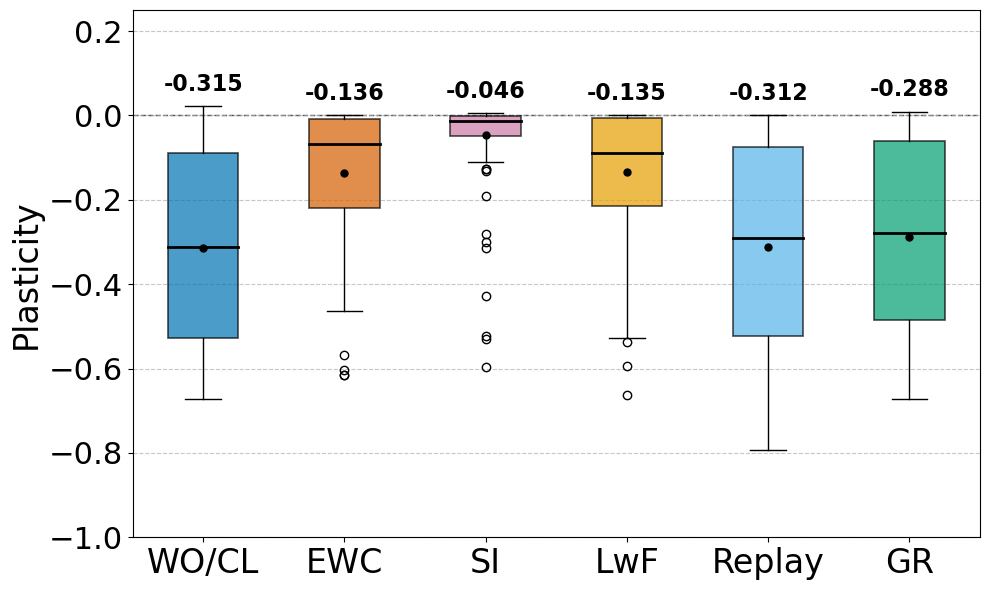

Saved boxplot to: /proj/sourasb-220503/IoT_attack_CL_IDS/results/plots/FWT_boxplot_6methods_toggle.png


In [9]:
import os, json
import numpy as np
import matplotlib.pyplot as plt

pwd = locals().get("pwd", os.getcwd())

def resolve_file(i, head, tail):
    cand1 = os.path.join(pwd, f"{i}_experiment_results_LSTM_{head}_{tail}.json")
    cand2 = os.path.join(pwd, f"{i}_experiment_results_LSTM__{head}_{tail}.json")
    if os.path.exists(cand1): return cand1
    if os.path.exists(cand2): return cand2
    print(f"[WARN] Neither exists: {cand1} nor {cand2}")
    return cand1

def collect_fwt_from_file(fp, scale01=True, clip01=True):
    with open(fp, "r") as f:
        data = json.load(f)
    fwt_dict = data.get("FWT_dict", {}) or {}
    vals = []
    for v in fwt_dict.values():
        if v is None: continue
        if isinstance(v, (list, tuple, np.ndarray)):
            vals.extend([float(x) for x in v if x is not None])
        else:
            vals.append(float(v))
    # arr = np.asarray(vals, dtype=float)
    # arr = arr[np.isfinite(arr)]
    # if scale01:
    #     arr = (arr + 1.0) / 2.0
    #     if clip01:
    #        arr = np.clip(arr, 0.0, 1.0)
    return vals # arr.tolist()

methods = [
    ("WO/CL",  lambda i: resolve_file(i, "WCL",           "toggle")),
    ("EWC",    lambda i: resolve_file(i, "EWC",           "toggle")),
    ("SI",     lambda i: resolve_file(i, "SI",            "toggle")),
    ("LwF",    lambda i: os.path.join(pwd, f"{i}_experiment_results_LSTM_LwF_toggle_alpha_1.0_T_4.0.json")),
    ("Replay", lambda i: resolve_file(i, "Replay_REPLAY", "toggle")),
    ("GR",     lambda i: resolve_file(i, "GR",            "toggle")),
]

fwt_groups, labels = [], []
for label, path_fn in methods:
    vals_all = []
    for i in (1, 2, 3):
        fp = path_fn(i)
        if not os.path.exists(fp):
            print(f"[WARN] Missing file for {label} run {i}: {fp}")
            continue
        vals_all.extend(collect_fwt_from_file(fp, scale01=True, clip01=True))
    if len(vals_all) == 0:
        print(f"[WARN] No FWT values for {label}; skipping.")
        continue
    fwt_groups.append(vals_all)
    labels.append(label)
    print(f"{label}: n={len(vals_all)}, mean={np.mean(vals_all):.4f}, std={np.std(vals_all):.4f}")

if not fwt_groups:
    raise RuntimeError("No data collected. Check file paths and FWT_dict contents.")

plt.figure(figsize=(10, 6))
bp = plt.boxplot(fwt_groups, labels=labels, showmeans=True, patch_artist=True)

palette = {
    "WO/CL": "#0072B2",
    "EWC":   "#D55E00",
    "SI":    "#CC79A7",
    "LwF":   "#E69F00",
    "Replay":"#56B4E9",
    "GR":    "#009E73",
}
for box, lab in zip(bp["boxes"], labels):
    box.set(facecolor=palette.get(lab, "#AAAAAA"), alpha=0.7, edgecolor="black", linewidth=1.2)
for median in bp["medians"]:
    median.set(color="black", linewidth=2)
for mean in bp["means"]:
    mean.set(marker="o", markerfacecolor="black", markeredgecolor="black", markersize=5)
for w in bp["whiskers"]:
    w.set(color="black")
for c in bp["caps"]:
    c.set(color="black")

plt.ylabel("Plasticity", fontsize=24)
plt.ylim(-1, 0.25)
plt.yticks(fontsize=22)
plt.xticks(fontsize=24)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# ---- Annotate mean values above each box ----
means = [float(np.mean(g)) for g in fwt_groups]
ax = plt.gca()
ymin, ymax = ax.get_ylim()
yrange = ymax - ymin
offset = 0.02 * yrange  # 2% of axis range
# medians = [float(np.median(g)) for g in fwt_groups]
# for x, md in enumerate(medians, start=1):
#     y = max(md - offset, ymin + 0.6 * yrange)
#     plt.text(x, y, f"{md:.3f}", ha="center", va="top", fontsize=12)
whisker_tops = [max(bp["whiskers"][i+1].get_ydata()) for i in range(0, len(bp["whiskers"]), 2)]

for x, (m, top) in enumerate(zip(means, whisker_tops), start=1):
    y = min(top + 0.02 * yrange, ymax - 0.01 * yrange)  # 2% above whisker, stay inside axes
    ax.text(
        x, y, f"{m:.3f}",
        ha="center", va="bottom", fontsize=16, fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.25", facecolor="white", edgecolor="none", alpha=0.8),
        zorder=3
    )
ax = plt.gca()
ax.axhline(0, linestyle="--", linewidth=1, color="0.3", zorder=0)
plt.tight_layout()

out_dir = os.path.join(pwd, "plots")
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, "FWT_boxplot_6methods_toggle.png")
plt.savefig(out_path, dpi=200)
plt.show()

print(f"Saved boxplot to: {out_path}")


WO/CL: n=141, mean=-0.3148, std=0.2269
EWC: n=141, mean=-0.1357, std=0.1557
SI: n=141, mean=-0.0463, std=0.0964
LwF: n=141, mean=-0.0670, std=0.0798
Replay: n=141, mean=-0.3118, std=0.2405
GR: n=141, mean=-0.2879, std=0.2221


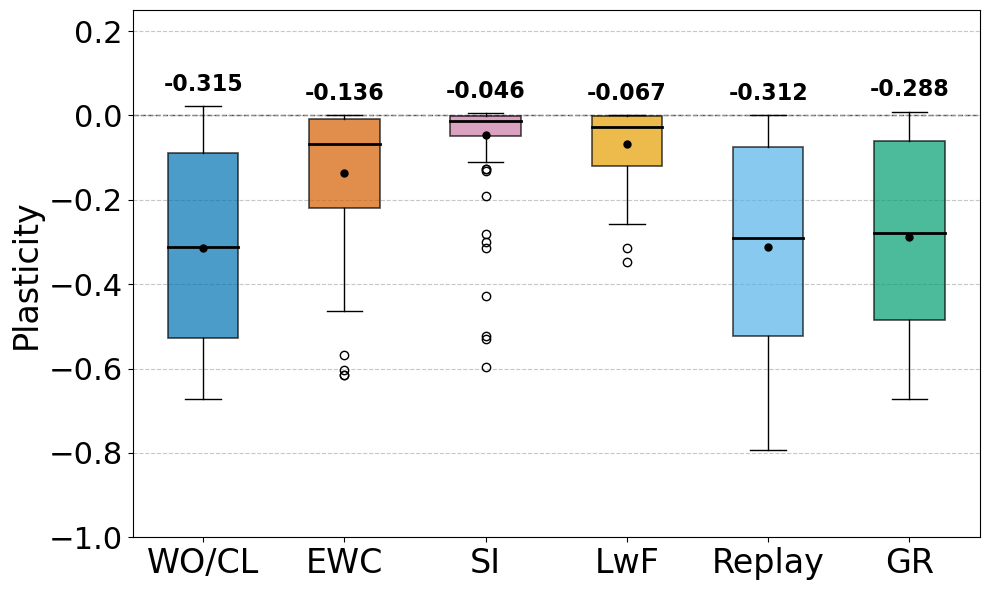

Saved boxplot to: /proj/sourasb-220503/IoT_attack_CL_IDS/results/plots/FWT_boxplot_6methods.png


In [30]:
import os, json
import numpy as np
import matplotlib.pyplot as plt

pwd = locals().get("pwd", os.getcwd())

def resolve_file(i, head, tail):
    cand1 = os.path.join(pwd, f"{i}_experiment_results_LSTM_{head}_{tail}.json")
    cand2 = os.path.join(pwd, f"{i}_experiment_results_LSTM__{head}_{tail}.json")
    if os.path.exists(cand1): return cand1
    if os.path.exists(cand2): return cand2
    print(f"[WARN] Neither exists: {cand1} nor {cand2}")
    return cand1

def collect_fwt_from_file(fp, scale01=True, clip01=True):
    with open(fp, "r") as f:
        data = json.load(f)
    fwt_dict = data.get("FWT_dict", {}) or {}
    vals = []
    for v in fwt_dict.values():
        if v is None: continue
        if isinstance(v, (list, tuple, np.ndarray)):
            vals.extend([float(x) for x in v if x is not None])
        else:
            vals.append(float(v))
    # arr = np.asarray(vals, dtype=float)
    # arr = arr[np.isfinite(arr)]
    # if scale01:
    #     arr = (arr + 1.0) / 2.0
    #     if clip01:
    #        arr = np.clip(arr, 0.0, 1.0)
    return vals # arr.tolist()

methods = [
    ("WO/CL",  lambda i: resolve_file(i, "WCL",           "toggle")),
    ("EWC",    lambda i: resolve_file(i, "EWC",           "toggle")),
    ("SI",     lambda i: resolve_file(i, "SI",            "toggle")),
    ("LwF",    lambda i: os.path.join(pwd, f"{i}_experiment_results_LSTM_LwF_random_alpha_1.0_T_4.0.json")),
    ("Replay", lambda i: resolve_file(i, "Replay_REPLAY", "toggle")),
    ("GR",     lambda i: resolve_file(i, "GR",            "toggle")),
]

fwt_groups, labels = [], []
for label, path_fn in methods:
    vals_all = []
    for i in (1, 2, 3):
        fp = path_fn(i)
        if not os.path.exists(fp):
            print(f"[WARN] Missing file for {label} run {i}: {fp}")
            continue
        vals_all.extend(collect_fwt_from_file(fp, scale01=True, clip01=True))
    if len(vals_all) == 0:
        print(f"[WARN] No FWT values for {label}; skipping.")
        continue
    fwt_groups.append(vals_all)
    labels.append(label)
    print(f"{label}: n={len(vals_all)}, mean={np.mean(vals_all):.4f}, std={np.std(vals_all):.4f}")

if not fwt_groups:
    raise RuntimeError("No data collected. Check file paths and FWT_dict contents.")

plt.figure(figsize=(10, 6))
bp = plt.boxplot(fwt_groups, labels=labels, showmeans=True, patch_artist=True)

palette = {
    "WO/CL": "#0072B2",
    "EWC":   "#D55E00",
    "SI":    "#CC79A7",
    "LwF":   "#E69F00",
    "Replay":"#56B4E9",
    "GR":    "#009E73",
}
for box, lab in zip(bp["boxes"], labels):
    box.set(facecolor=palette.get(lab, "#AAAAAA"), alpha=0.7, edgecolor="black", linewidth=1.2)
for median in bp["medians"]:
    median.set(color="black", linewidth=2)
for mean in bp["means"]:
    mean.set(marker="o", markerfacecolor="black", markeredgecolor="black", markersize=5)
for w in bp["whiskers"]:
    w.set(color="black")
for c in bp["caps"]:
    c.set(color="black")

plt.ylabel("Plasticity", fontsize=24)
plt.ylim(-1, 0.25)
plt.yticks(fontsize=22)
plt.xticks(fontsize=24)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# ---- Annotate mean values above each box ----
means = [float(np.mean(g)) for g in fwt_groups]
ax = plt.gca()
ymin, ymax = ax.get_ylim()
yrange = ymax - ymin
offset = 0.02 * yrange  # 2% of axis range
# medians = [float(np.median(g)) for g in fwt_groups]
# for x, md in enumerate(medians, start=1):
#     y = max(md - offset, ymin + 0.6 * yrange)
#     plt.text(x, y, f"{md:.3f}", ha="center", va="top", fontsize=12)
whisker_tops = [max(bp["whiskers"][i+1].get_ydata()) for i in range(0, len(bp["whiskers"]), 2)]

for x, (m, top) in enumerate(zip(means, whisker_tops), start=1):
    y = min(top + 0.02 * yrange, ymax - 0.01 * yrange)  # 2% above whisker, stay inside axes
    ax.text(
        x, y, f"{m:.3f}",
        ha="center", va="bottom", fontsize=16, fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.25", facecolor="white", edgecolor="none", alpha=0.8),
        zorder=3
    )
ax = plt.gca()
ax.axhline(0, linestyle="--", linewidth=1, color="0.3", zorder=0)
plt.tight_layout()

out_dir = os.path.join(pwd, "plots")
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, "FWT_boxplot_6methods.png")
plt.savefig(out_path, dpi=200)
plt.show()

print(f"Saved boxplot to: {out_path}")
